In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns

#### Работа с данными в `Pandas`

**Задача**: предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?

Сделать можно на Питоне в Юпитер или Экселе или в Гугл Шите, даже можете в SQL сделать, как удобнее.

Обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K')

In [ ]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


In [ ]:
df.shape

(76857, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           76857 non-null  int64  
 1   order_id          76857 non-null  float64
 2   reg_date          76857 non-null  object 
 3   transaction_date  76857 non-null  object 
 4   revenue           76857 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
df.isna().mean()

user_id             0.0
order_id            0.0
reg_date            0.0
transaction_date    0.0
revenue             0.0
dtype: float64

Переведем колонки с датами из формата строки в `datetime`.

`errors='coerce'` - при переводе строки в дату некорректные данные будус помечены как `NaN`.

In [ ]:
df[['reg_date', 'transaction_date']] = df[['reg_date', 
                                           'transaction_date']].apply(lambda x: pd.to_datetime(x, 
                                                                                               format='%Y-%m-%d', 
                                                                                               errors='coerce'))

In [ ]:
df.dtypes

user_id                      int64
order_id                   float64
reg_date            datetime64[ns]
transaction_date    datetime64[ns]
revenue                      int64
dtype: object

In [ ]:
df['reg_date'].agg(['min', 'max'])

min   1900-01-01
max   2015-11-20
Name: reg_date, dtype: datetime64[ns]

Создадим колонку для каждого юзера с первым днем месяца регистрации и транзакции, чтобы смотреть в разрезе месяца.

In [ ]:
df[['reg_month', 'transaction_month']] = df[['reg_date', 'transaction_date']].to_numpy().astype('datetime64[M]')

In [ ]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
0,57562,94545.0,2013-12-22,2015-07-16,1088,2013-12-01,2015-07-01
1,40047,81824.0,2013-11-24,2015-01-19,1027,2013-11-01,2015-01-01
2,48153,144851.0,2015-07-03,2015-10-29,601,2015-07-01,2015-10-01
3,54591,116111.0,2013-07-12,2015-04-30,881,2013-07-01,2015-04-01
4,39789,134943.0,2013-05-25,2015-07-21,984,2013-05-01,2015-07-01


In [ ]:
df.groupby('reg_month')['user_id'].agg(['count', 'nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-01,9,9
2012-03-01,362,361
2012-04-01,370,370
2012-05-01,301,301
2012-06-01,445,443
2012-07-01,370,369
2012-08-01,271,269
2012-09-01,356,355


Транзакции есть только за 2015 год.

In [ ]:
df.groupby('transaction_month')['user_id'].agg(['count', 'nunique'])

,count,nunique
transaction_month,,
2015-01-01,4058,3951
2015-02-01,4932,4777
2015-03-01,5824,5599
2015-04-01,6102,5862
2015-05-01,6339,6063
2015-06-01,6829,6480
2015-07-01,7520,7166
2015-08-01,8598,8110
2015-09-01,8468,7964


Есть `user_id` и `order_id` с отрицательными значениями.

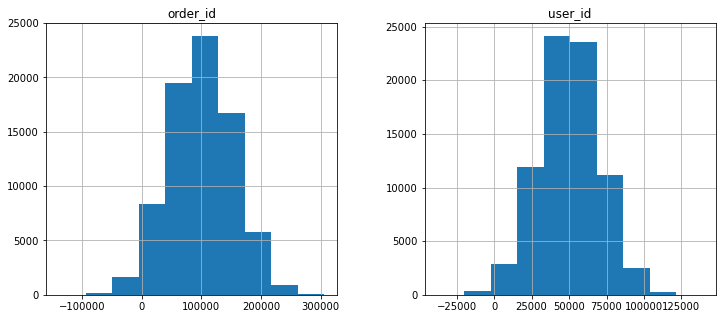

In [ ]:
df[['order_id', 'user_id']].hist(figsize=(12, 5));

`user_id` и `order_id` были сгенерены из нормального распределения ))

 У `revenue` - тоже нормальное распределение. Совсем нормальное ))

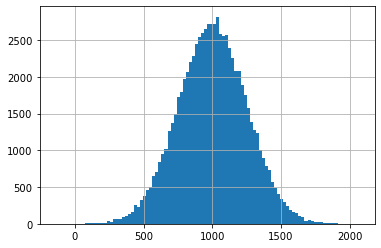

In [ ]:
df['revenue'].hist(bins=100);

У некоторых юзеров по несколько дат регистрации - не баг, а фича ))

In [ ]:
df[df['user_id']==53288]

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
13,53288,198591.0,2015-01-08,2015-04-24,773,2015-01-01,2015-04-01
50765,53288,201203.0,2013-02-01,2015-11-10,988,2013-02-01,2015-11-01


Сгруппируем датафрейм по `user_id` -  оставим только дату регистрации `reg_date`.

In [ ]:
users = df.groupby('user_id')['reg_month'].min().reset_index()

In [ ]:
users.head()

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01


В таблице с транзакциями по месяцам, у нас всего 11 месяцев - сгенерим "календарь" с месяцами для конкретного года. 

In [ ]:
months = pd.DataFrame(pd.date_range(df['transaction_month'].min(), 
                       df['transaction_month'].max(), 
                       freq='MS'))

months.columns = ['month']

In [ ]:
months

,month
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


Для получения когорт по месяцам - сделаем кросс-джойн между таблицами `users` и `months` - каждому юзеру в `user_id` добавятся все значения из таблицы `months`.

Добавим допонительные ключи, по которым будем джойнить.

Теперь, на каждого юзера вместо 1 строки будет 11 - по количеству месяцов в датафрейме `months`. 

In [ ]:
users['key'] = 1
months['key'] = 1

In [ ]:
template = users.merge(months, on='key')[['user_id', 'reg_month', 'month']]

Удалим для юзеров, которые, к примеру, зарегистрировались в середине года "лишние" месяца - месяца которые предшествовали месяцу регистрации.

In [ ]:
template = template[template['month'] >= template['reg_month']]

In [ ]:
template.head()

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01


Теперь можно для каждого юзера, на каждый месяц джойнить транзакции и считать ретеншен.

Сгруппируем исходный датафрейм по юзерам и месяцу транзакции. Посчитаем сумму дохода на каждого юзера за каждый месяц.

In [ ]:
transactions_by_month = df.groupby(['user_id', 
                                    'transaction_month'])['revenue'].sum().to_frame().reset_index()

# Переименуем колонки чтобы было удобней джойнить
transactions_by_month.columns = ['user_id', 'month', 'revenue']

In [ ]:
transactions_by_month.head()

,user_id,month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899


Делаем `LEFT JOIN` для таблицы `template` и `transactions_by_month`. Для месяцев из таблицы `template` в которых **нет транзакций** - проставятся `NaN`.

In [ ]:
report = template.merge(transactions_by_month, 
                        on=['user_id', 'month'], 
                        how='left')

In [ ]:
report.head()

,user_id,reg_month,month,revenue
0,-37599,2015-01-01,2015-01-01,NaN
1,-37599,2015-01-01,2015-02-01,NaN
2,-37599,2015-01-01,2015-03-01,1182.0
3,-37599,2015-01-01,2015-04-01,NaN
4,-37599,2015-01-01,2015-05-01,NaN


Проставим для юзеров, у которых в месяцее были тразакции маркер `is_active` $=1$.

In [ ]:
report['is_active'] = (report['revenue'] > 0) * 1

In [ ]:
report.head()

,user_id,reg_month,month,revenue,is_active
0,-37599,2015-01-01,2015-01-01,NaN,0
1,-37599,2015-01-01,2015-02-01,NaN,0
2,-37599,2015-01-01,2015-03-01,1182.0,1
3,-37599,2015-01-01,2015-04-01,NaN,0
4,-37599,2015-01-01,2015-05-01,NaN,0


**Сводная таблица**: среднее количество (процент) активных юзеров по месяцам в разрезе месяца регистрации.

*Процент активных юзеров* $=$ сумма $1$ (активных юзеров) делим на количество $0$ и $1$ за каждый месяц. 

In [ ]:
report.pivot_table(index='reg_month', 
                   columns='month', 
                   values='is_active', 
                   aggfunc='mean') # sum / count

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.150943,0.169811,0.339623,0.150943,0.169811,0.245283,0.113208,0.094340,0.094340,0.169811,0.094340
2012-02-01,0.111111,0.222222,0.111111,0.000000,0.444444,0.222222,0.222222,0.222222,0.222222,0.000000,0.222222
2012-03-01,0.146814,0.157895,0.124654,0.152355,0.146814,0.182825,0.168975,0.193906,0.177285,0.293629,0.160665
2012-04-01,0.146341,0.138211,0.230352,0.168022,0.168022,0.170732,0.170732,0.165312,0.176152,0.241192,0.178862
2012-05-01,0.097315,0.157718,0.167785,0.187919,0.187919,0.181208,0.177852,0.248322,0.174497,0.211409,0.181208
2012-06-01,0.116972,0.142202,0.146789,0.206422,0.172018,0.160550,0.162844,0.158257,0.197248,0.243119,0.176606
2012-07-01,0.136490,0.142061,0.153203,0.175487,0.167131,0.153203,0.181058,0.192201,0.147632,0.261838,0.186630
2012-08-01,0.079545,0.151515,0.185606,0.200758,0.151515,0.151515,0.193182,0.215909,0.204545,0.250000,0.189394
2012-09-01,0.156522,0.130435,0.153623,0.191304,0.165217,0.171014,0.144928,0.173913,0.165217,0.194203,0.144928


Решим нашу задачу - посмотрим, улучшился ли ретеншен пользователей, после акции, которую провели в июле?

Посчитаем **LTV** - Lifetime value: разницу между `month` и `reg_month`. В месяцах.

**Сначала - округлим**, после переведем в `int`. Иначе, к примеру, у значения `number_of_months = 1.96` LTV будет - $1$, а должно быть - $2$.

In [ ]:
report['lifetime'] = ((report['month'] - report['reg_month']) / 
                          np.timedelta64(1, 'M')).round().astype(int)

In [ ]:
report.head()

,user_id,reg_month,month,revenue,is_active,lifetime
0,-37599,2015-01-01,2015-01-01,NaN,0,0
1,-37599,2015-01-01,2015-02-01,NaN,0,1
2,-37599,2015-01-01,2015-03-01,1182.0,1,2
3,-37599,2015-01-01,2015-04-01,NaN,0,3
4,-37599,2015-01-01,2015-05-01,NaN,0,4


Оставим данные только за 2015 год и последущие.

In [ ]:
report = report[report['reg_month'] >= '2015-01-01']

**Сводная таблица**: LTV юзеров по месяцам в разрезе месяца регистрации.

То есть, - $\%$ активных юзеров, имевших тразакции на каждый месяц после месяца регистрации - $0$ месяца.

In [ ]:
retention = report.pivot_table(index='reg_month', 
                   columns='lifetime', 
                   values='is_active', 
                   aggfunc='mean') # sum / count

In [ ]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


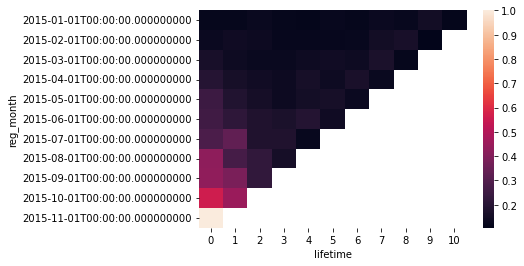

In [ ]:
sns.heatmap(retention);

**Вывод**: видно, что с июля, ретеншн дейтвительно вырос.

#### Работа с данными в `SQL`

In [ ]:
import sqlite3

In [ ]:
sqlite3.sqlite_version

'3.36.0'

In [ ]:
conn = sqlite3.connect('database')

In [ ]:
cursor = conn.cursor()

In [ ]:
def select(sql):
    return pd.read_sql(sql, conn)

Считаем датафрейм заново и переведем даты из строк в `datetime`.

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K')

In [ ]:
df[['reg_date', 'transaction_date']] = df[['reg_date', 
                                           'transaction_date']].apply(lambda x: pd.to_datetime(x, 
                                                                                               format='%Y-%m-%d', 
                                                                                               errors='coerce'))

In [ ]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           76857 non-null  int64         
 1   order_id          76857 non-null  float64       
 2   reg_date          76857 non-null  datetime64[ns]
 3   transaction_date  76857 non-null  datetime64[ns]
 4   revenue           76857 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.9 MB


Зальем датафрейм в базу данных.

In [ ]:
df.to_sql('transactions', 
          conn, 
          index=False, 
          if_exists='replace')

In [ ]:
sql = '''
SELECT *

FROM transactions t'''

select(sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22 00:00:00,2015-07-16 00:00:00,1088
1,40047,81824.0,2013-11-24 00:00:00,2015-01-19 00:00:00,1027
2,48153,144851.0,2015-07-03 00:00:00,2015-10-29 00:00:00,601
3,54591,116111.0,2013-07-12 00:00:00,2015-04-30 00:00:00,881
4,39789,134943.0,2013-05-25 00:00:00,2015-07-21 00:00:00,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15 00:00:00,2015-03-28 00:00:00,1095
76853,31360,145146.0,2015-01-04 00:00:00,2015-08-09 00:00:00,547
76854,56195,8929.0,2012-09-18 00:00:00,2015-11-12 00:00:00,850
76855,46362,78673.0,2015-02-20 00:00:00,2015-07-21 00:00:00,356


Так как у некоторых юзеров есть несколько дат регистрации - сгруппируем юзеров с минимальной датой регистрации.

Минимальную дату регистрации - переведем в месяц.

In [ ]:
sql = '''
SELECT t.user_id,
DATE(MIN(t.reg_date), 'start of month') reg_month

FROM transactions t

GROUP BY t.user_id'''

select(sql)

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


Сгенерируем диапазон дат.

In [ ]:
min_date = '''
SELECT DATE(MIN(t.transaction_date),
'start of month') min_month

FROM transactions t'''

select(min_date)

,min_month
0,2015-01-01


In [ ]:
max_date = '''
SELECT DATE(MAX(t.transaction_date), 'start of month') max_month

FROM transactions t'''

select(max_date)

,max_month
0,2015-11-01


При помощи `f`-строки сократим запись, чтобы не плодить подзапросы.

In [ ]:
sql = f'''WITH RECURSIVE months(month) AS (
VALUES(({min_date}))
UNION ALL
SELECT DATE(month, '+1 month')
FROM months
WHERE month < ({max_date}))

SELECT month FROM months'''

select(sql)

,month
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


* Джойним для каждого юзера все месяца из таблицы `months`. Это можно записать как:
`JOIN months m ON 1=1` либо просто как `CROSS JOIN months` без указания условия.
* Оставляем для каждого юзера месяц регистрации и все последующие месяца. От предыдущих до месяца регистрации - избавляемся.
* Из исходной таблицы `transactions` делаем таблицу по юзерам, месяцам в которых были транзакции , суммой транзакций по месяцам и количеством транзакций по месяцам - `transaction_month`.
* В `report` проставляем для каждого юзера в каждом месяце маркер `is_active` $=1$ если у юзера в этом месяце была транзакция. Считаем `lifetime` по месяцам.
* Считаем среднюю долю активных юзеров по месяцам - получаем ретеншн. Оставляем данные только за 2015 год.


In [ ]:
sql = f'''WITH users AS (
-- 1. Юзеры по месяцу регистрации
SELECT t.user_id, DATE(MIN(t.reg_date), 'start of month') reg_month
FROM transactions t
GROUP BY t.user_id),

-- 2. Сгенерированная таблица с месяцами 2015 года
months AS (
WITH RECURSIVE months(month) AS (VALUES(({min_date}))
UNION ALL
SELECT DATE(month, '+1 month')
FROM months
WHERE month < ({max_date}))



SELECT month FROM months),

-- 3. Кросс-джойним юзеров и таблицу с месяцами, оставляем месяца которые >= месяцу регистрации       
template AS (
SELECT u.user_id, u.reg_month, m.month

FROM users u

JOIN months m ON 1=1

WHERE m.month >= u.reg_month),
        
-- 4. В таблице с транзакциями выделяем из даты транзакции месяц,
-- Считаем сумму и количество транзакций по месяцам для каждого юзера    
       
transaction_month AS (
SELECT t.user_id,
DATE(t.transaction_date, 'start of month') month,
SUM(t.revenue) revenue,
COUNT(user_id) number_of_transactions

FROM transactions t

GROUP BY t.user_id, month),

-- 5. К template-таблице джойним транзакции, проставляем маркер активности юзера, если были в месяце траназакции,
-- Считаем lifetime - разницу между месяцем транзакции и регистрации      
       
report AS (
SELECT t.*,
tm.revenue,
tm.number_of_transactions,
CASE WHEN tm.revenue > 0 THEN 1 ELSE 0 END is_active,
ROUND(((JULIANDAY(t.month) - JULIANDAY(t.reg_month)) / 30)) lifetime_in_months

FROM template t

LEFT JOIN transaction_month tm ON t.user_id=tm.user_id and t.month=tm.month)

-- 6. Финальная таблица: считаем среднее количество активых (платящих) юзеров в каждом месяце, lifetime в месяцах.
-- Только для юзеров с регистрацией >= 2015-01-01       
       
SELECT r.reg_month, r.lifetime_in_months, AVG(r.is_active) retention

FROM report r

WHERE r.reg_month >= '2015-01-01'

GROUP BY r.reg_month, r.lifetime_in_months
'''

select(sql)

,reg_month,lifetime_in_months,retention
0,2015-01-01,0.0,0.116928
1,2015-01-01,1.0,0.116056
2,2015-01-01,2.0,0.129581
3,2015-01-01,3.0,0.116492
4,2015-01-01,4.0,0.115183
...,...,...,...
61,2015-09-01,1.0,0.381497
62,2015-09-01,2.0,0.221414
63,2015-10-01,0.0,0.561974
64,2015-10-01,1.0,0.448857


In [ ]:
t = select(sql)

In [ ]:
t.pivot_table(index='reg_month', 
              columns='lifetime_in_months', 
              values='retention', 
              aggfunc='mean')

lifetime_in_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
